# Analyze data by Category I made by the Price/SQFT price:

## Category 1: Price/SQFT range 50 cents - 3.40 dollar

### First, impoprt data, add parameters, and remove outliers. 

This research will be category 1. I will do this analysis first because this category has the most amount of the data. Unlike Vancouver data, this could find some pattern. 

In [1]:
from functions import add_params, subplot_by_cluster, remove_outliers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.figsize": (10, 6), "figure.dpi": 120})
import seaborn as sns

In [2]:
# As you can tell the number of scraped data is exceeding the number of the post, so I remove duplicate. 
df = pd.read_csv('.\Data\\rental_price_data.csv',).drop('Unnamed: 0', axis=1)
df.sort_values(by="Post Datetime", ascending=False, inplace=True)
len(df)

401087

In [3]:
data = add_params(df)
# Remove outliers
data = remove_outliers(data)

Original DataFrame Size:21211
Number of Dropped Rows: 76
DataFrame size after drop rows: 21135


In [4]:
# Split the data in Vancouver, Toronto, and Fraser Valley
van_data = data[data["City Code"] == "VAN"]
tor_data = data[data["City Code"] == 'TOR']
fv_data = data[data['City Code'] == 'ABB']
len(van_data), len(tor_data), len(fv_data)

(13947, 5133, 2055)

## Check the data by Categories:

0
count    6002.000000
mean        0.002456
std         0.028939
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.491667
Name: Price/SQFT, dtype: float64

1
count    8155.000000
mean        2.372034
std         0.637383
min         0.505342
25%         1.875000
50%         2.400000
75%         2.937500
max         3.400000
Name: Price/SQFT, dtype: float64

2
count    3484.000000
mean        3.783913
std         0.229723
min         3.400955
25%         3.585469
50%         3.769231
75%         3.994253
max         4.200000
Name: Price/SQFT, dtype: float64

3
count    3012.000000
mean        4.767419
std         0.427097
min         4.200323
25%         4.405001
50%         4.672307
75%         5.055402
max         5.800000
Name: Price/SQFT, dtype: float64

4
count    467.000000
mean       6.755083
std        1.170455
min        5.802220
25%        6.000000
50%        6.359091
75%        6.987578
max       14.314928
Name: Price/SQFT, dtyp

21120

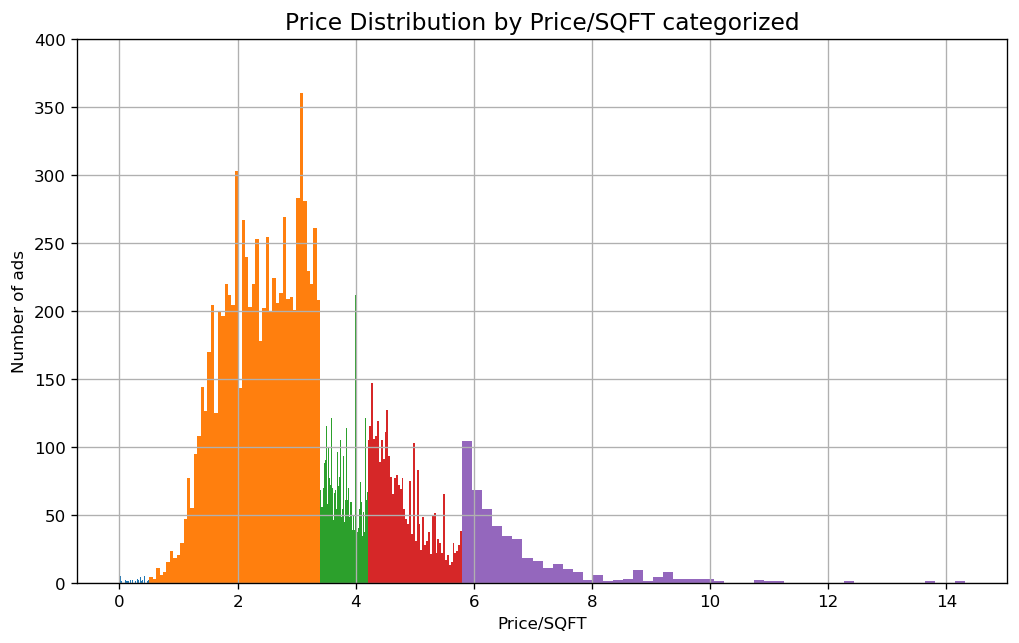

In [5]:
# Drop outliers
df_priceSqft_outlier =data[data['Price/SQFT'] > 15]
df = data.drop(df_priceSqft_outlier.index, axis=0)
df_grouped = df.groupby('price_range')

number_row = 0
# Print data frame, lenth of data by category
for name, group in df_grouped:
    print(name)
    group['Price/SQFT'].hist(bins=50)
    plt.ylim(0, 400)
    plt.title("Price Distribution by Price/SQFT categorized", fontsize=14)
    plt.xlabel('Price/SQFT')
    plt.ylabel('Number of ads')
    print(group["Price/SQFT"].describe())
    number_row += len(group)
    print()
number_row

It is little different than Vancouver dataset. Category 2 got the most number of listing. I think because the area except Vancouver or Toronto, the price range is narrow. 

price_range: 1
Length of DataFrame: 8155


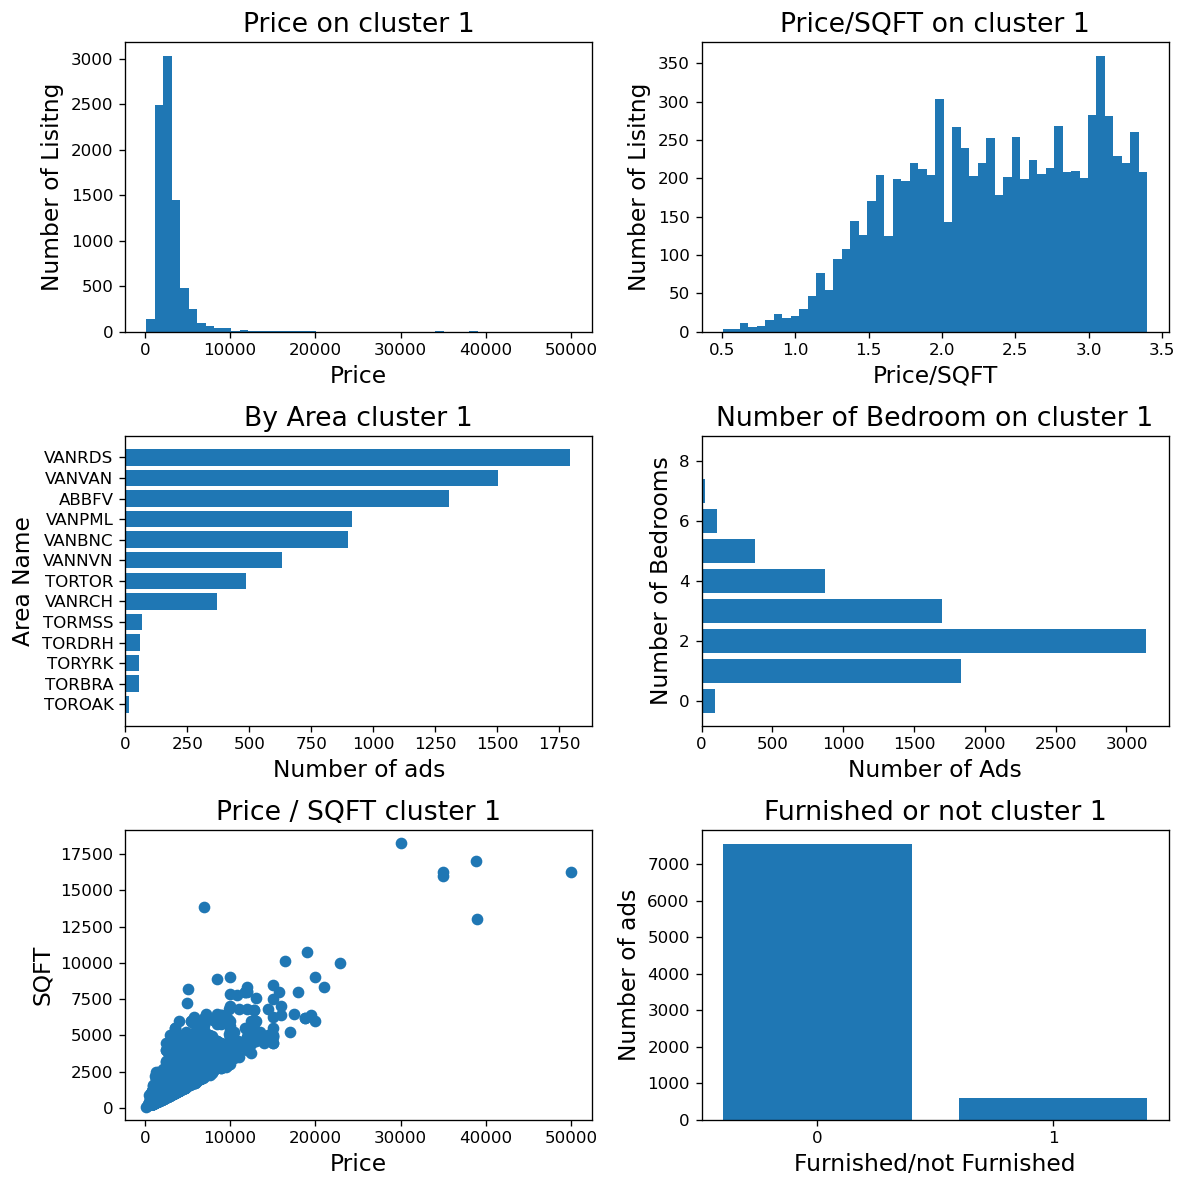

In [6]:
subplot_by_cluster(df, 1, param='price_range')

In [7]:
# Define the data category1
data = df[df['price_range'] == 1]

In [8]:
len(data)

8155

In [9]:
# Correlation Matrix
data.corr()

,PostArea_coded,Bedroom,SQFT,Price,IsFurnished,Price/SQFT
PostArea_coded,1.000000,-0.002707,0.031074,0.127438,0.059993,0.231673
Bedroom,-0.002707,1.000000,0.766764,0.644171,-0.004673,-0.431259
SQFT,0.031074,0.766764,1.000000,0.846705,0.054107,-0.450788
Price,0.127438,0.644171,0.846705,1.000000,0.120930,-0.026994
IsFurnished,0.059993,-0.004673,0.054107,0.120930,1.000000,0.084783
Price/SQFT,0.231673,-0.431259,-0.450788,-0.026994,0.084783,1.000000


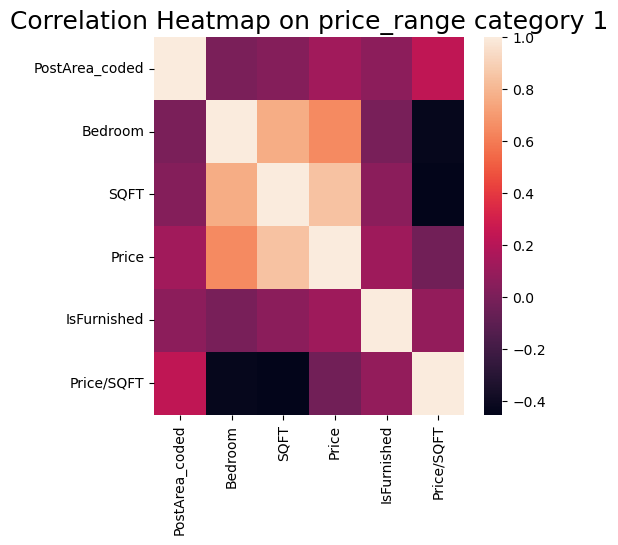

In [13]:
plt.figure(figsize=(5, 5), dpi=100)
sns.heatmap(data.corr())
plt.title("Correlation Heatmap on price_range category 1", fontsize=18)
plt.show()